# Load packages and define useful functions

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Compare results for fishing vessels, cargo and tankers, and fishing, cargo, and tankers

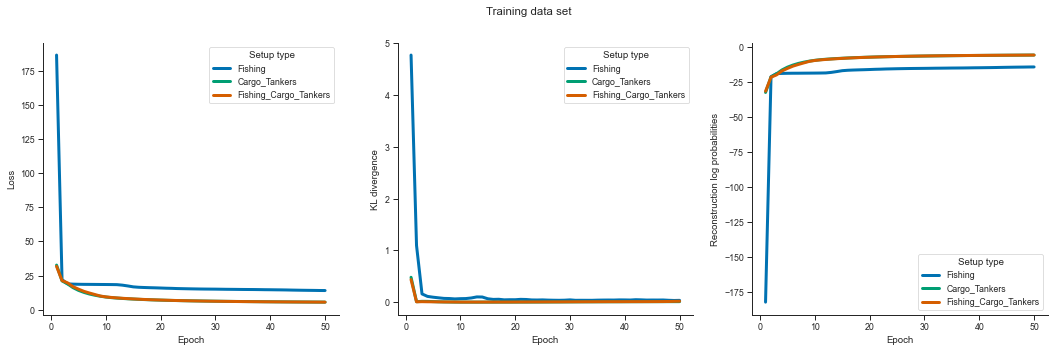

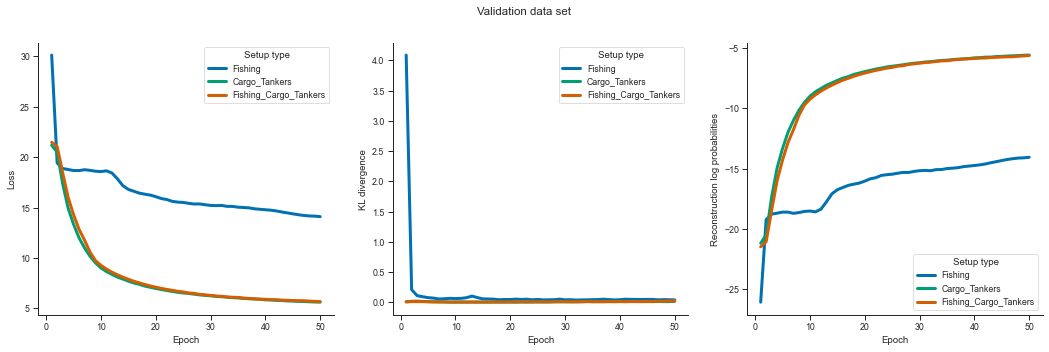

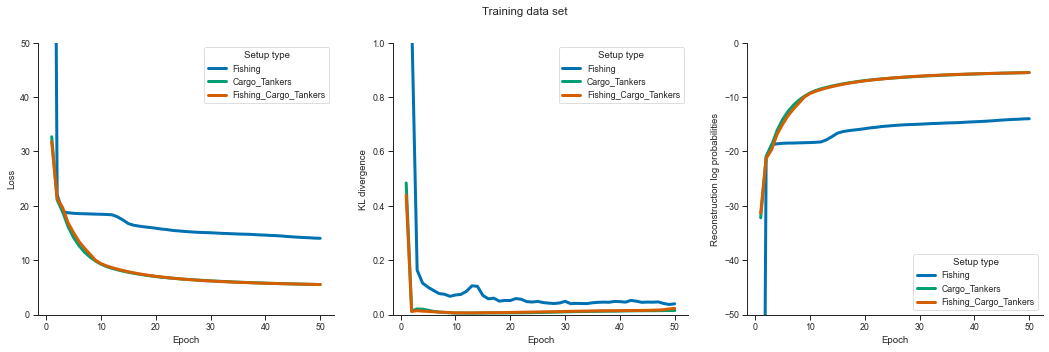

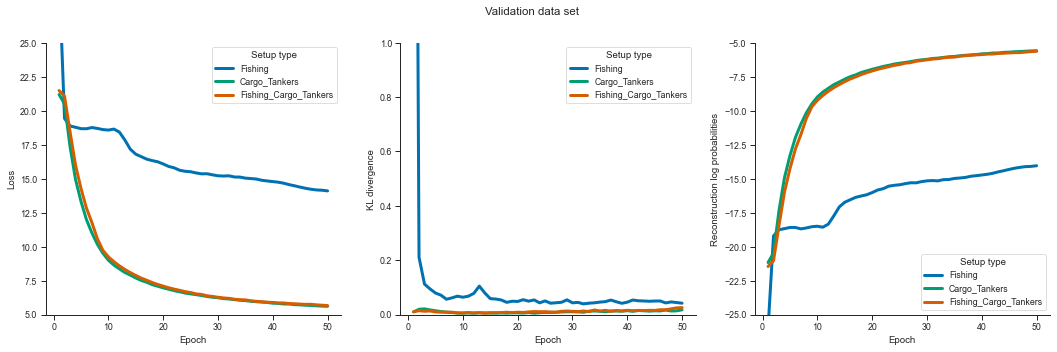

In [2]:
# Use the SummaryModels class
setup_type = "Fishing"
summary_models_fish = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600")
df_default_fish = summary_models_fish.load_curves_df(setup_type)
df_track_lvl_fish = summary_models_fish.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

setup_type = "Cargo_Tankers"
summary_models_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600")
df_default_carg_tank = summary_models_carg_tank.load_curves_df(setup_type)
df_track_lvl_carg_tank = data = summary_models_carg_tank.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

setup_type = "Fishing_Cargo_Tankers"
summary_models_fish_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600")
df_default_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df(setup_type)
df_track_lvl_fish_carg_tank = data = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type)["TrajectoryLevelData"] 

# Combine the different vessel type date frames 
df = pd.concat([df_default_fish, df_default_carg_tank, df_default_fish_carg_tank])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing", "Cargo_Tankers", "Fishing_Cargo_Tankers"]

# Plot the learning curves
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Zoom in
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                                          ylims=[(0, 50), (0, 1), (-50, 0)])
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order,
                                          title="Validation data set", ylims=[(5, 25), (0, 1), (-25, -5)])

#### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities for fishing, cargo and tanker vessels

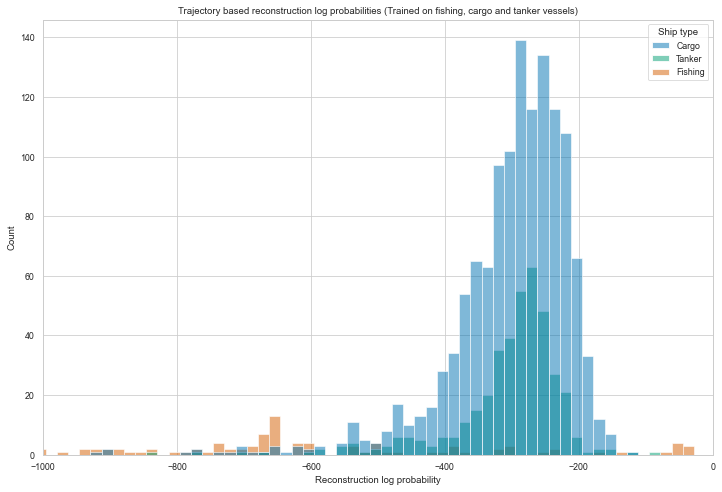

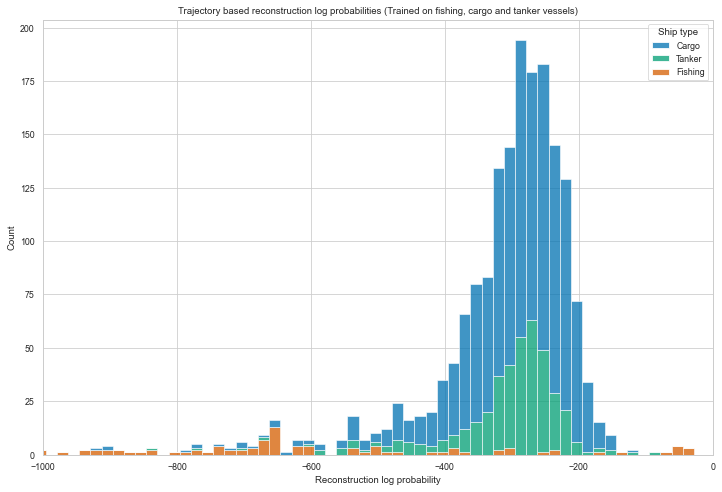

Mean Reconstruction log probability: -336.67937187371274
Median Reconstruction log probability: -288.70350646972656
Reconstruction log probability statistics by ship type: 
            count        mean         std          min         25%  \
Ship type                                                            
Cargo      1293.0 -306.023323  114.321891 -1633.834595 -338.228821   
Fishing     122.0 -741.926718  377.664578 -1814.240356 -991.049591   
Tanker      401.0 -312.235718  109.307848 -1286.628784 -327.897400   

                  50%         75%         max  
Ship type                                      
Cargo     -284.053497 -242.596848 -126.971558  
Fishing   -671.251678 -520.168350  -28.075764  
Tanker    -286.516144 -259.615173  -93.818481  


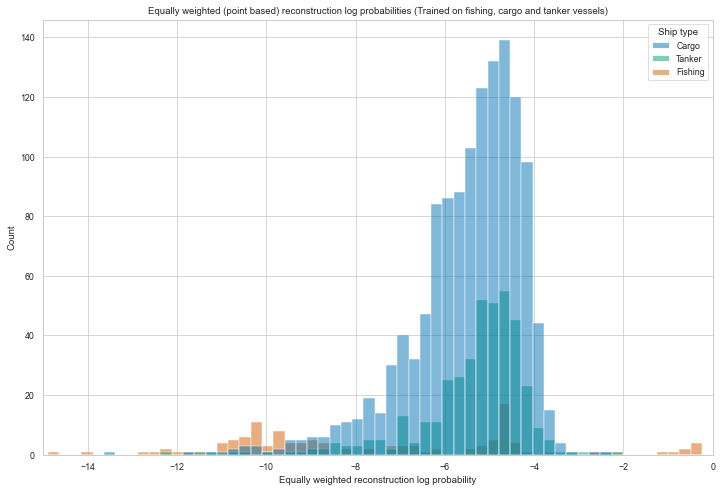

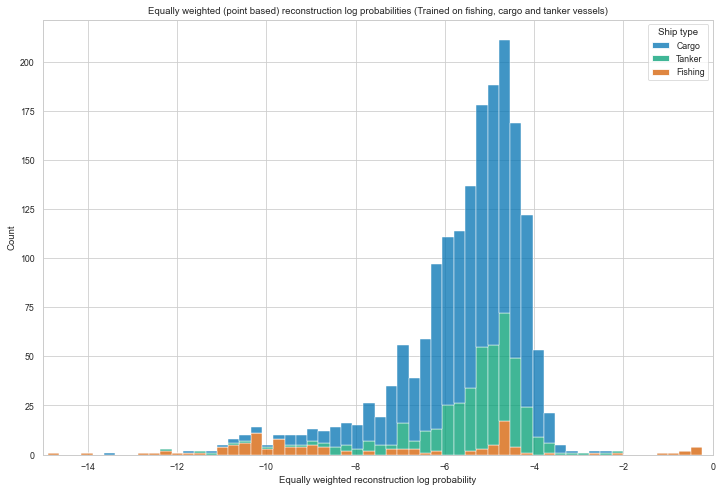

Mean Equally weighted reconstruction log probability: -5.632402413707316
Median Equally weighted reconstruction log probability: -5.224141126858717
Equally weighted reconstruction log probability statistics by ship type: 
            count      mean       std        min        25%       50%  \
Ship type                                                               
Cargo      1293.0 -5.527941  1.508604 -33.343563  -6.092542 -5.239563   
Fishing     122.0 -7.593187  3.264864 -14.751169 -10.231117 -8.707529   
Tanker      401.0 -5.372683  1.280365 -12.133020  -5.789319 -5.072563   

                75%       max  
Ship type                      
Cargo     -4.594282 -2.410593  
Fishing   -4.711114 -0.243635  
Tanker    -4.608566 -2.231980  

 Look at some length statistics:
            count        mean        std   min   25%    50%    75%    max
Ship type                                                                
Cargo      1293.0   56.600928  16.244934  25.0  44.0   57.0   67.0  14

In [3]:
hue = "Ship type"
hue_order = ["Cargo", "Tanker", "Fishing"]

# Plot trajectory based reconstruction log probabilities for fishing, cargo and tanker vessels - Zoomed in
title = "Trajectory based reconstruction log probabilities (Trained on fishing, cargo and tanker vessels)"
x = "Reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Histogram", 
                                                title=title, x=x, hue=hue, hue_order=hue_order, xlim=[-1000, 0])
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Stacked", x=x, hue=hue, 
                                                title=title, hue_order=hue_order, xlim=[-1000, 0], print_summary_stats=True)

# Plot equally weighted (point based) reconstruction log probabilities for fishing, cargo and tanker vessels - Zoomed in
title = "Equally weighted (point based) reconstruction log probabilities (Trained on fishing, cargo and tanker vessels)"
x = "Equally weighted reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Histogram",
                                                title=title, x=x, hue=hue, hue_order=hue_order, xlim=[-15, 0])
summary_models_fish_carg_tank.hist_stacked_plot(df_track_lvl_fish_carg_tank, type="Stacked", x=x, hue=hue,
                                                title=title, hue_order=hue_order, xlim=[-15, 0], print_summary_stats=True)

print("\n Look at some length statistics:")
print(df_track_lvl_fish_carg_tank.groupby("Ship type")["Length"].describe())

#### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities for fishing vessels

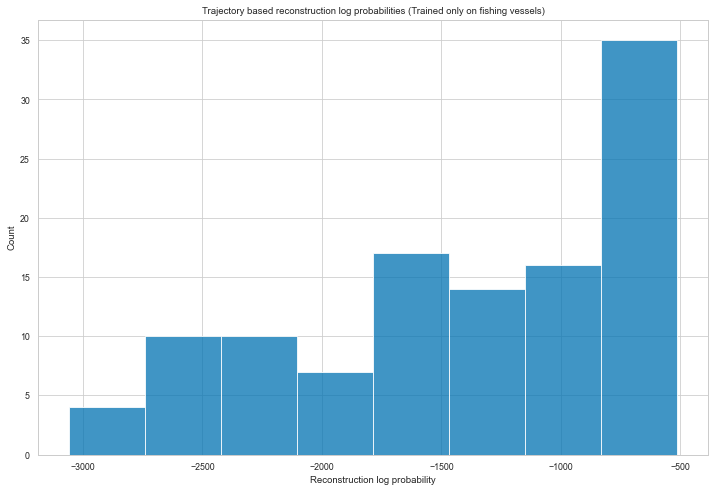

Mean Reconstruction log probability: -1402.4305252480297
Median Reconstruction log probability: -1268.4569091796875
Reconstruction log probability statistics by ship type: 
           count         mean         std          min          25%  \
Ship type                                                             
Fishing    113.0 -1402.430525  678.897345 -3059.996826 -1859.343384   

                   50%         75%         max  
Ship type                                       
Fishing   -1268.456909 -804.856567 -512.345703  


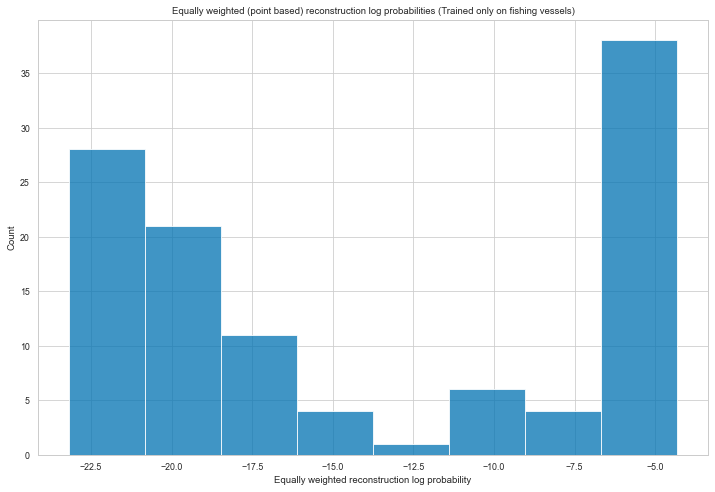

Mean Equally weighted reconstruction log probability: -14.054024696936455
Median Equally weighted reconstruction log probability: -17.671443394252233
Equally weighted reconstruction log probability statistics by ship type: 
           count       mean       std        min      25%        50%  \
Ship type                                                              
Fishing    113.0 -14.054025  6.924215 -23.193506 -20.8264 -17.671443   

                75%       max  
Ship type                      
Fishing   -6.098812 -4.309867  

 Look at some length statistics for fishing vessels only training data set:
           count        mean        std   min   25%    50%    75%    max
Ship type                                                               
Fishing    113.0  111.699115  34.560993  30.0  86.0  124.0  141.0  144.0


In [5]:
# Plot trajectory based reconstruction log probabilities for fishing vessels
title = "Trajectory based reconstruction log probabilities (Trained only on fishing vessels)"
x = "Reconstruction log probability"
summary_models_fish.hist_stacked_plot(df_track_lvl_fish, type="Histogram", x=x, title=title, print_summary_stats=True)

# Plot equally weighted (point based) reconstruction log probabilities for fishing vessels
title = "Equally weighted (point based) reconstruction log probabilities (Trained only on fishing vessels)"
x = "Equally weighted reconstruction log probability"
summary_models_fish.hist_stacked_plot(df_track_lvl_fish, type="Histogram", x=x, title=title, print_summary_stats=True)

print("\n Look at some length statistics for fishing vessels only training data set:")
print(df_track_lvl_fish.groupby("Ship type")["Length"].describe())

#### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities for fishing vessels - Comparison

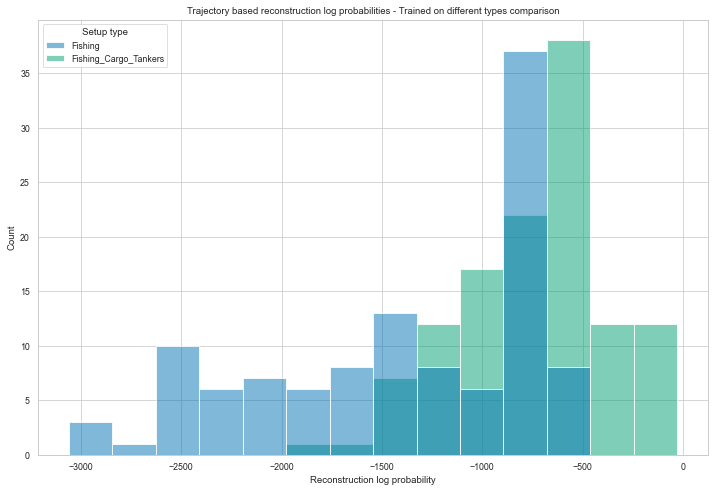

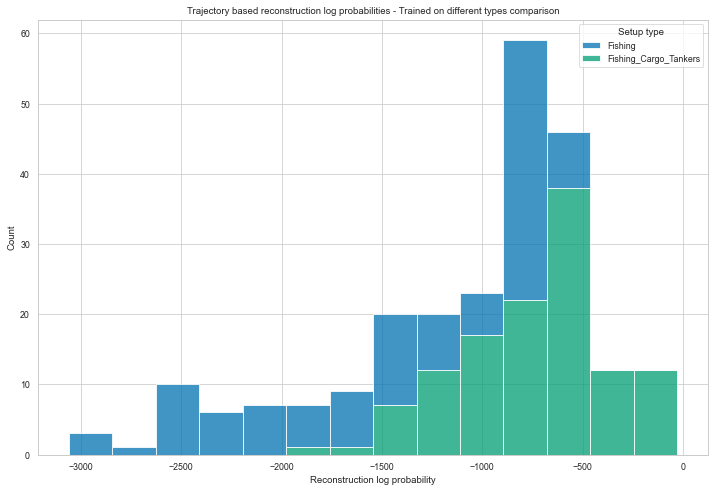

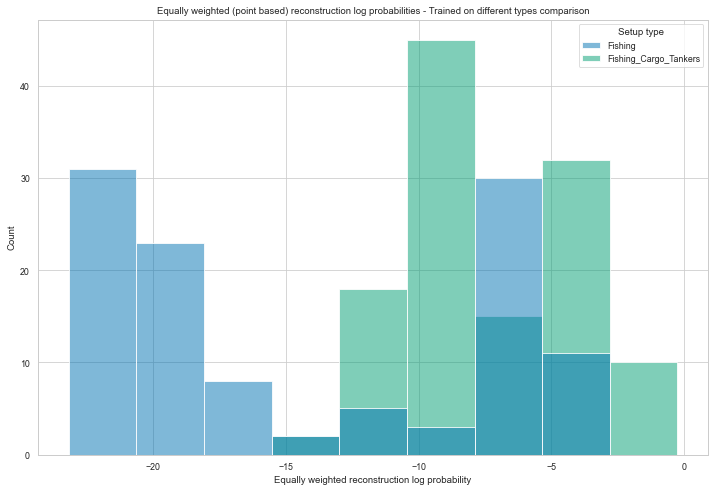

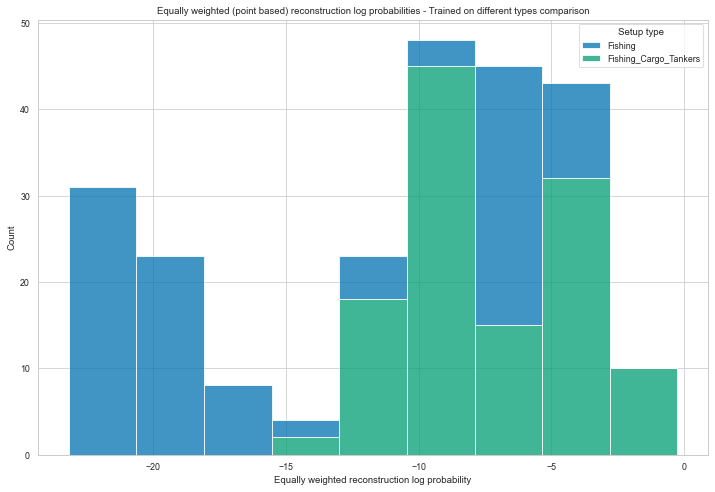

In [6]:
# Combine the different vessel type date frames (that validated on any fishing vessels)
df_all_fish = df_track_lvl_fish_carg_tank[df_track_lvl_fish_carg_tank["Ship type"] == "Fishing"]
df = pd.concat([df_all_fish, df_track_lvl_fish])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing", "Fishing_Cargo_Tankers"]

# Plot trajectory based reconstruction log probabilities for fishing vessels
title = "Trajectory based reconstruction log probabilities - Trained on different types comparison"
x = "Reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Histogram", title=title, x=x, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Stacked", x=x, hue=hue, title=title, hue_order=hue_order)

# Plot equally weighted (point based) reconstruction log probabilities for fishing vessels
title = "Equally weighted (point based) reconstruction log probabilities - Trained on different types comparison"
x = "Equally weighted reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Histogram", title=title, x=x, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df, type="Stacked", x=x, hue=hue, title=title, hue_order=hue_order)

# Annealed Kullback–Leibler 

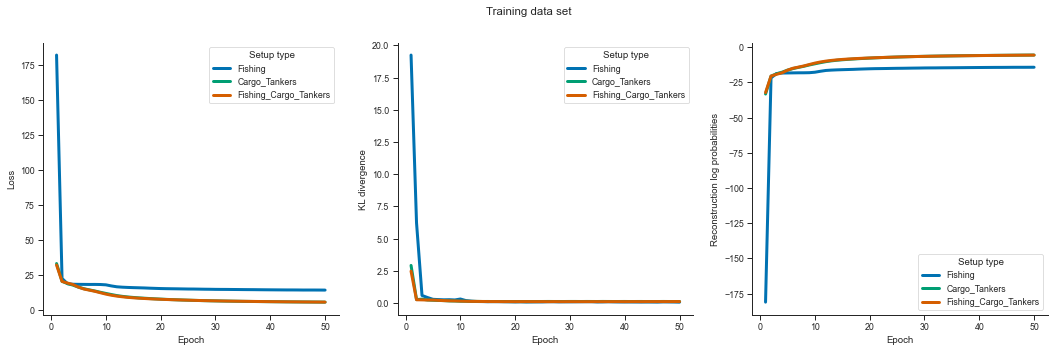

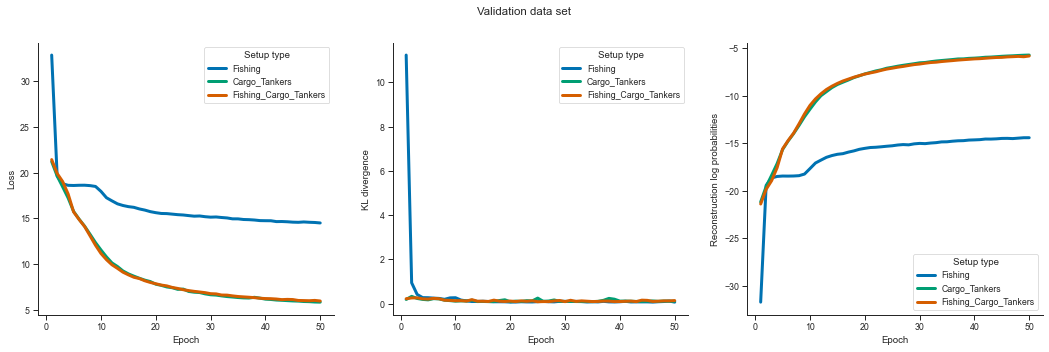

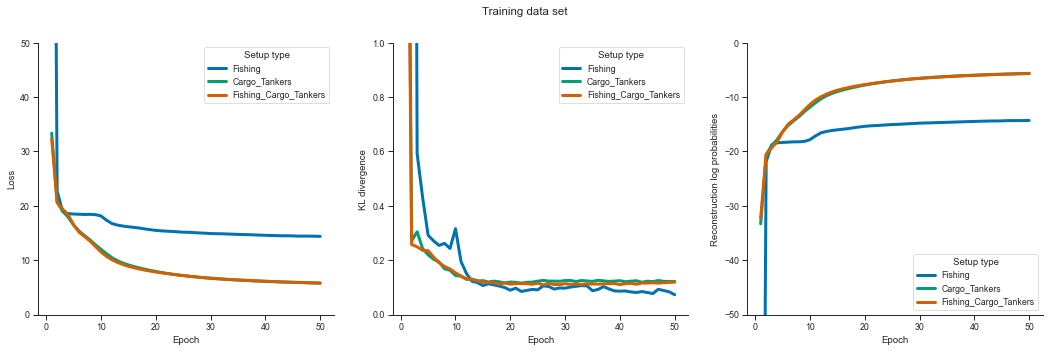

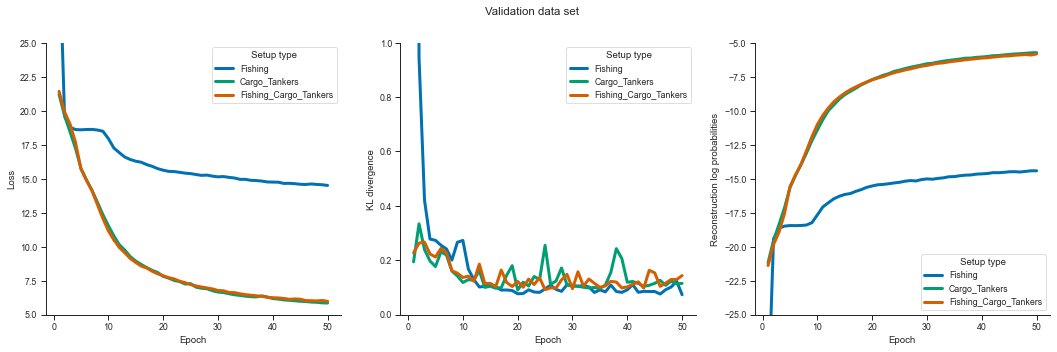

In [7]:
# Use the SummaryModels class
summary_models = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", kl_annealing=True)
df_annealing_fish = summary_models.load_curves_df("Fishing")
summary_models = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600", kl_annealing=True)
df_annealing_carg_tank = summary_models.load_curves_df("Cargo_Tankers")
summary_models = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600", kl_annealing=True)
df_annealing_fish_carg_tank = summary_models.load_curves_df("Fishing_Cargo_Tankers")

# Combine the different vessel type date frames 
df = pd.concat([df_annealing_fish, df_annealing_carg_tank, df_annealing_fish_carg_tank])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Fishing", "Cargo_Tankers", "Fishing_Cargo_Tankers"]

# Plot the learning curves
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Zoom in
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set",
                           ylims=[(0, 50), (0, 1), (-50, 0)])
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set",
                           ylims=[(5, 25), (0, 1), (-25, -5)])